In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 2.1.0


In [2]:
!ls ../imagenet/ILSVRC/Data/CLS-LOC/train

n01440764 n01986214 n02110185 n02488702 n03042490 n03662601 n04033995 n04487394
n01443537 n01990800 n02110341 n02489166 n03045698 n03666591 n04037443 n04493381
n01484850 n02002556 n02110627 n02490219 n03047690 n03670208 n04039381 n04501370
n01491361 n02002724 n02110806 n02492035 n03062245 n03673027 n04040759 n04505470
n01494475 n02006656 n02110958 n02492660 n03063599 n03676483 n04041544 n04507155
n01496331 n02007558 n02111129 n02493509 n03063689 n03680355 n04044716 n04509417
n01498041 n02009229 n02111277 n02493793 n03065424 n03690938 n04049303 n04515003
n01514668 n02009912 n02111500 n02494079 n03075370 n03691459 n04065272 n04517823
n01514859 n02011460 n02111889 n02497673 n03085013 n03692522 n04067472 n04522168
n01518878 n02012849 n02112018 n02500267 n03089624 n03697007 n04069434 n04523525
n01530575 n02013706 n02112137 n02504013 n03095699 n03706229 n04070727 n04525038
n01531178 n02017213 n02112350 n02504458 n03100240 n03709823 n04074963 n04525305
n01532829 n02018207 n02112706 n02509815 

In [3]:
training_folder_name = '../imagenet/ILSVRC/Data/CLS-LOC/train'
val_folder_name = '../imagenet/ILSVRC/Data/CLS-LOC/val'

# The folder contains a subfolder for each class of shape
classes = sorted(os.listdir(training_folder_name))
print(classes)

['.DS_Store', '.local_hist', 'n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01518878', 'n01530575', 'n01531178', 'n01532829', 'n01534433', 'n01537544', 'n01558993', 'n01560419', 'n01580077', 'n01582220', 'n01592084', 'n01601694', 'n01608432', 'n01614925', 'n01616318', 'n01622779', 'n01629819', 'n01630670', 'n01631663', 'n01632458', 'n01632777', 'n01641577', 'n01644373', 'n01644900', 'n01664065', 'n01665541', 'n01667114', 'n01667778', 'n01669191', 'n01675722', 'n01677366', 'n01682714', 'n01685808', 'n01687978', 'n01688243', 'n01689811', 'n01692333', 'n01693334', 'n01694178', 'n01695060', 'n01697457', 'n01698640', 'n01704323', 'n01728572', 'n01728920', 'n01729322', 'n01729977', 'n01734418', 'n01735189', 'n01737021', 'n01739381', 'n01740131', 'n01742172', 'n01744401', 'n01748264', 'n01749939', 'n01751748', 'n01753488', 'n01755581', 'n01756291', 'n01768244', 'n01770081', 'n01770393', 'n01773157', 'n01773549', 'n0177379

In [4]:
transformation = transforms.Compose([
        # Randomly augment the image data
            # Random horizontal flip
        #transforms.RandomHorizontalFlip(0.5),
            # Random vertical flip
        #transforms.RandomVerticalFlip(0.3),
        # transform to tensors
        transforms.ToTensor(),
        transforms.Resize(size=(128, 128)),
        # Normalize the pixel values (in R, G, and B channels)
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

train_dataset = torchvision.datasets.ImageFolder(
    root=training_folder_name,
    transform=transformation
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    num_workers=0,
    shuffle=False
)

In [6]:
val_dataset = torchvision.datasets.ImageFolder(
    root=val_folder_name,
    transform=transformation
)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=64,
    num_workers=0,
    shuffle=False
)
for X, y in val_loader:
    break
X.shape, X

(torch.Size([64, 3, 128, 128]),
 tensor([[[[-1.9645e-01,  4.3122e-01, -1.1581e-01,  ...,  4.0081e-01,
             3.7720e-01,  5.7173e-01],
           [ 2.3567e-01,  3.2249e-01,  1.9579e-01,  ...,  1.8148e-01,
             1.3367e-01,  1.2554e-01],
           [ 3.0397e-01, -2.7696e-01,  4.8691e-01,  ...,  4.1100e-01,
             1.6998e-01,  3.7501e-01],
           ...,
           [ 3.1360e-02,  1.6398e-02,  1.5686e-01,  ..., -1.5481e-01,
             2.2627e-02,  3.0353e-01],
           [ 3.1652e-02, -4.8376e-02, -2.5532e-01,  ..., -8.7823e-02,
             2.7229e-01, -8.1756e-02],
           [-2.2969e-01, -1.3983e-01, -1.3712e-01,  ...,  1.2652e-01,
             3.8304e-02, -2.0381e-01]],
 
          [[-8.6291e-02,  5.0784e-01,  9.4831e-02,  ...,  5.0684e-01,
             4.0191e-01,  6.7320e-01],
           [ 2.8087e-01,  6.4375e-01,  1.2142e-01,  ...,  2.5389e-01,
             1.7640e-01,  2.3518e-01],
           [ 1.8977e-01, -1.3693e-01,  3.0681e-01,  ...,  4.8309e-01,
       

In [10]:
for X, y in val_loader:
    break
X.shape, X

(torch.Size([64, 3, 128, 128]),
 tensor([[[[-1.9645e-01,  4.3122e-01, -1.1581e-01,  ...,  4.0081e-01,
             3.7720e-01,  5.7173e-01],
           [ 2.3567e-01,  3.2249e-01,  1.9579e-01,  ...,  1.8148e-01,
             1.3367e-01,  1.2554e-01],
           [ 3.0397e-01, -2.7696e-01,  4.8691e-01,  ...,  4.1100e-01,
             1.6998e-01,  3.7501e-01],
           ...,
           [ 3.1360e-02,  1.6398e-02,  1.5686e-01,  ..., -1.5481e-01,
             2.2627e-02,  3.0353e-01],
           [ 3.1652e-02, -4.8376e-02, -2.5532e-01,  ..., -8.7823e-02,
             2.7229e-01, -8.1756e-02],
           [-2.2969e-01, -1.3983e-01, -1.3712e-01,  ...,  1.2652e-01,
             3.8304e-02, -2.0381e-01]],
 
          [[-8.6291e-02,  5.0784e-01,  9.4831e-02,  ...,  5.0684e-01,
             4.0191e-01,  6.7320e-01],
           [ 2.8087e-01,  6.4375e-01,  1.2142e-01,  ...,  2.5389e-01,
             1.7640e-01,  2.3518e-01],
           [ 1.8977e-01, -1.3693e-01,  3.0681e-01,  ...,  4.8309e-01,
       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


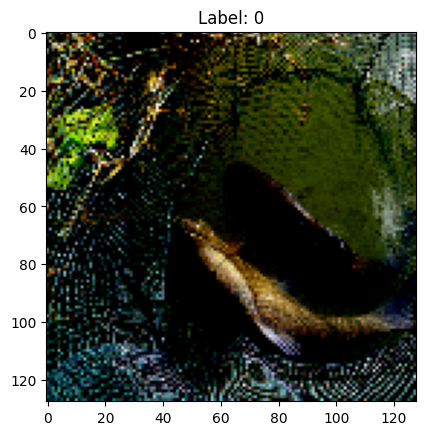

In [11]:
import matplotlib.pyplot as plt
def show_image(image, label):
    image = image.permute(1, 2, 0)
    plt.imshow(image.squeeze())
    plt.title(f'Label: {label}')
    plt.show()
show_image(X[0], y[0])

In [12]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [13]:
model = torchvision.models.resnet18(weights='ResNet18_Weights.DEFAULT')
model = model.to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [15]:
loss_fn(model(X.to(device)), y.to(device))

tensor(10.5812, device='mps:0', grad_fn=<NllLossBackward0>)

In [16]:
from math import sqrt
import time
def train(dataloader, model, loss_fn, optimizer, epoch, writer):
    size = len(dataloader.dataset)
    model.train()
    start = time.time()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        batch_size = len(X)
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * batch_size
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}], {current/size * 100}%")
            step = epoch * len(dataloader) + batch
            writer.add_scalar('training loss',
                            loss,
                            step)
            delta = time.time() - start
            if batch != 0:
                print("Done in ", delta, " seconds")
                remaining = size - current
                speed = 100 * batch_size / delta
                remaining = speed * remaining
                print("Remaining time (seconds): ", remaining)
        optimizer.zero_grad()

In [19]:
def test(dataloader, model, loss_fn, epoch, writer=None):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    step = epoch * len(test_dataloader)
    if writer != None:
        writer.add_scalar('test loss',
                            test_loss,
                            step)
    correct /= size
    if writer != None:
        writer.add_scalar('test accuracy',
                            100*correct,
                            step)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
start = time.time()
test(val_loader, model, loss_fn, optimizer)
print("Done in ", time.time() - start, " seconds")

In [ ]:
# testing single epoch, measuring time
#from torch.utils.tensorboard import SummaryWriter
#writer = SummaryWriter('runs/resnet_sgd_1')    
#start = time.time()
#train(train_loader, model, loss_fn, optimizer)
#print("Done in ", time.time() - start, " seconds")

In [ ]:
loss_fn(model(X.to(device)), y.to(device))